# Heuristic algorithm to minimize AoI 
## By Weiqi Wang, Jin Xu

In [9]:
import numpy as np
import networkx as nx 
import itertools
import copy
import pandas as pd
import matplotlib.pyplot as plt

import aoi_utils

## Define sample graphs using adjacency matrix

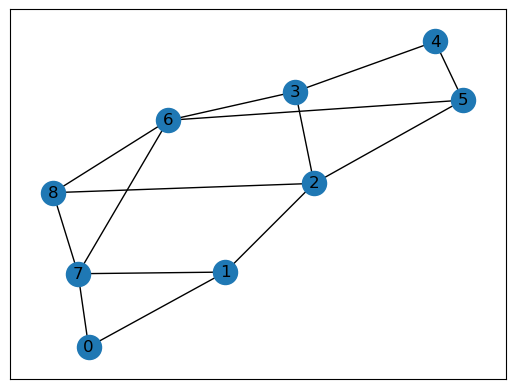

In [10]:

#test the AoI of the route given by CPP 

graph4 = [[0,0,1,0],
          [0,0,1,1],
          [1,1,0,1],
          [0,1,1,0]]


graph5 = [[0,1,0,0,0],
          [1,0,0,0,1],
          [0,0,0,1,1],
          [0,0,1,0,1],
          [0,1,1,1,0]]



# g = np.array([[0,1,1,1,1],
#           [1,0,1,0,0],
#           [1,1,0,0,0],
#           [1,0,0,0,1],
#           [1,0,0,1,0]])
# g_array = np.array([[0,1,1,1,1,1],[1,0,1,0,0,0],[1,1,0,0,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0]])

# n_edges = 30
# g_array = np.zeros((n_edges,n_edges))
# for i in range(n_edges):
#     if i == 0:
#         g_array[0,1:] = np.ones((1,n_edges-1))
#     elif i == 1:
#         g_array[i,0] = 1
#         g_array[i,2] = 1
#     elif i == 2:
#         g_array[i,0] = 1
#         g_array[i,1] = 1        
#     else:
#         g_array[i,0] = 1
g_array =     np.array([[0, 4, 0, 0, 0, 0, 0, 8, 0], 
                        [4, 0, 8, 0, 0, 0, 0, 11, 0], 
                        [0, 8, 0, 7, 0, 4, 0, 0, 2], 
                        [0, 0, 7, 0, 9, 0, 14, 0, 0], 
                        [0, 0, 0, 9, 0, 10, 0, 0, 0], 
                        [0, 0, 4, 0, 10, 0, 2, 0, 0], 
                        [0, 0, 0, 14, 0, 2, 0, 1, 6], 
                        [8, 11, 0, 0, 0, 0, 1, 0, 7], 
                        [0, 0, 2, 0, 0, 0, 6, 7, 0] 
                    ]); 

# g =               np.array( [[0, 3, 1, 0, 5, 0], 
#                         [3, 0, 0, 1, 0, 6], 
#                         [1, 0, 0, 0, 2, 0], 
#                         [0, 1, 0, 0, 0, 1], 
#                         [5, 0, 2, 0, 0, 4], 
#                         [0, 6, 0, 1, 4, 0],     
#                     ]); 

g = nx.from_numpy_array(g_array)
g = nx.MultiGraph(g)
nx.draw_networkx(g, with_labels=True) 

In [3]:
print(aoi_utils.sum_edges(g))

93


## Add edges to convert the original graph to Eulerian graph. Then use Fleury's algorithm and heuristic AoI algorithem to get a patrol route of the graph, and compare the AoI.

In [4]:
g_aug = aoi_utils.smallest_eularian_graph(g)
source = 0
naive_circuit = [u for u,v in nx.eulerian_circuit(g_aug, source)] + [source]
heuristic_circuit = aoi_utils.heuristic_AoI_eulerian_circuit(g_aug, source)
random_eulerian_circuit = aoi_utils.random_eulerian_circuit(g_aug, source)
print(g_aug.edges.data('weight'))
print(naive_circuit)
print('CPP_AoI', aoi_utils.AoI_Compute(g_array,naive_circuit)) 
print(heuristic_circuit)
print('Heu_AoI', aoi_utils.AoI_Compute(g_array,heuristic_circuit)) 

[(0, 1, 4), (0, 7, 8), (1, 2, 8), (1, 2, 8), (1, 7, 11), (2, 3, 7), (2, 3, 7), (2, 5, 4), (2, 5, 4), (2, 8, 2), (2, 8, 2), (3, 4, 9), (3, 6, 14), (4, 5, 10), (5, 6, 2), (6, 7, 1), (6, 8, 6), (7, 8, 7)]
[0, 7, 8, 2, 8, 6, 5, 2, 5, 4, 3, 2, 3, 6, 7, 1, 2, 1, 0]
CPP_AoI 5178.8421052631575
[0, 7, 8, 2, 3, 6, 5, 2, 1, 7, 6, 8, 2, 3, 4, 5, 2, 1, 0]
CPP_AoI 4702.921052631579


## Show all edges in the augmented graph

In [5]:
print(g_aug.edges.data('weight'))

[(0, 1, 4), (0, 7, 8), (1, 2, 8), (1, 2, 8), (1, 7, 11), (2, 3, 7), (2, 3, 7), (2, 5, 4), (2, 5, 4), (2, 8, 2), (2, 8, 2), (3, 4, 9), (3, 6, 14), (4, 5, 10), (5, 6, 2), (6, 7, 1), (6, 8, 6), (7, 8, 7)]


## Duplicated graph

In [6]:
g_dup = aoi_utils.add_augmenting_path_to_graph(g, g.edges())
print('route_length',aoi_utils.sum_edges(g_dup))
route_dup = [u for u,v in nx.eulerian_circuit(g_dup, source)] + [source]
print('Dup_AoI', aoi_utils.AoI_Compute(g_array,route_dup))

route_length 186
Dup_AoI 7219.37634408602


## Test the algorithm using 100 random runs

In [7]:
s = 0
for i in range(100):
    heuristic_circuit = aoi_utils.heuristic_AoI_eulerian_circuit(g_aug, source)
    s += aoi_utils.AoI_Compute(g_array,heuristic_circuit) 
print(s/100)

4771.594999999999


In [8]:
s = 0
for i in range(100):
    heuristic_circuit = aoi_utils.random_eulerian_circuit(g_aug, source)
    s += aoi_utils.AoI_Compute(g_array,heuristic_circuit) 
print(s/100)

4991.395555555557
